<h1 style="text-align: center;">Iris dataset</h1>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import IPython
IPython.display.set_matplotlib_formats("svg")

In [4]:
import seaborn as sns

In [5]:
sns.__version__

'0.9.0'

In [6]:
iris = sns.load_dataset("iris");

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


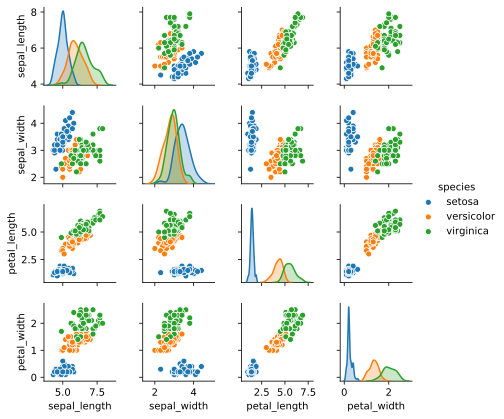

In [13]:
sns.pairplot(iris, hue="species", height=1.5)

Extract feature matrix and target array from the `DataFrame`:

In [8]:
X_iris = iris.drop("species", axis=1);

In [9]:
X_iris.shape

(150, 4)

In [10]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y_iris = iris["species"]

# Simple linear regression

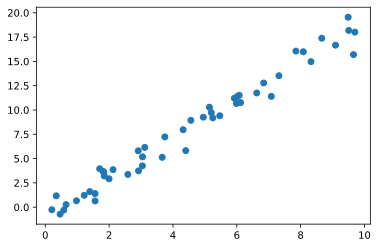

In [11]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Reshape the feature array from 1d to 2d

In [19]:
x.shape

(50,)

In [18]:
X = x[:,np.newaxis]
X.shape

(50, 1)

Fit the model

In [20]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([1.9776566])

In [22]:
model.intercept_

-0.9033107255311164

Predict labels for unknown data

In [25]:
xfit = np.linspace(-1.0,11.0,50) # use 50 points (default)
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

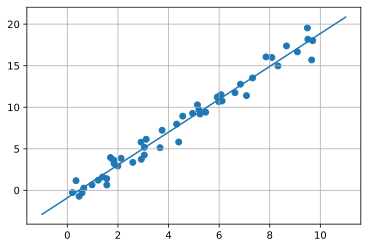

In [28]:
plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.grid()

# Iris classification

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

Using naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()

In [48]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [52]:
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

Fit on training data

In [38]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

Prediction on test data

In [39]:
y_model = model.predict(Xtest)

Calculate accuracy score

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(ytest, y_model)

0.9736842105263158

In [43]:
ytest

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
56     versicolor
141     virginica
44         setosa
29         setosa
120     virginica
94     versicolor
5          setosa
102     virginica
51     versicolor
78     versicolor
42         setosa
92     versicolor
66     versicolor
31         setosa
35         setosa
90     versicolor
84     versicolor
77     versicolor
40         setosa
125     virginica
99     versicolor
33         setosa
19         setosa
73     versicolor
146     virginica
91     versicolor
135     virginica
69     versicolor
128     virginica
114     virginica
48         setosa
53     versicolor
28         setosa
Name: species, dtype: object

In [46]:
np.transpose(y_model)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

# Iris dimensionality

In [59]:
from sklearn.decomposition import PCA

In [61]:
model = PCA(n_components=2)

In [62]:
model.fit(X_iris)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [63]:
X_2D = model.transform(X_iris)

In [64]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

In [66]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,0,-2.728717,0.326755


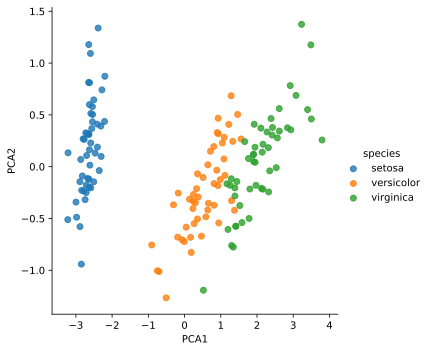

In [67]:
sns.lmplot("PCA1", "PCA2", hue="species", data=iris, fit_reg=False)

# Iris clustering

In [68]:
from sklearn.mixture import GaussianMixture

In [69]:
model = GaussianMixture(n_components=3, covariance_type="full")

In [70]:
model.fit(X_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Determine cluster labels

In [71]:
y_gmm = model.predict(X_iris)

In [72]:
iris["cluster"] = y_gmm

In [73]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,1,-2.728717,0.326755


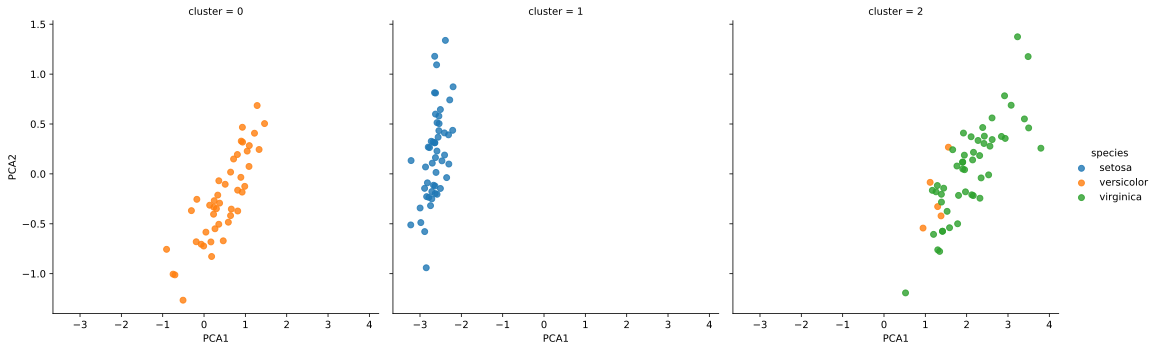

In [74]:
sns.lmplot("PCA1", "PCA2", data=iris, hue="species", col="cluster", fit_reg=False)